## Predicting Students Performance using Simple Linear Regression

### Harshan Attar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Supervised ML
<br>Regression
<br>Simple Linear Regression

In [2]:
# Data Gathering
df = pd.read_csv('https://raw.githubusercontent.com/yash240990/Python/master/Grade_Set_1.csv')
df

,Hours_Studied,Test_Grade,Status,Result
0,2,57,fail,D
1,3,66,fail,D
2,4,73,pass,C
3,5,76,pass,C
4,6,79,pass,C
5,7,81,pass,B
6,8,90,pass,B
7,9,96,pass,A
8,10,100,pass,A


In [3]:
# Stage 2 : EDA
df.shape

(9, 4)

In [4]:
df.columns

Index(['Hours_Studied', 'Test_Grade', 'Status', 'Result'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hours_Studied  9 non-null      int64 
 1   Test_Grade     9 non-null      int64 
 2   Status         9 non-null      object
 3   Result         9 non-null      object
dtypes: int64(2), object(2)
memory usage: 416.0+ bytes


In [6]:
# Stage 3: Data Preparation

# a). Check for missing values
# b). check for duplicate values
# c). convert non numerical features into numerical
# d.) normalixation
# e.) Select independent and dependent variable

In [7]:
df

,Hours_Studied,Test_Grade,Status,Result
0,2,57,fail,D
1,3,66,fail,D
2,4,73,pass,C
3,5,76,pass,C
4,6,79,pass,C
5,7,81,pass,B
6,8,90,pass,B
7,9,96,pass,A
8,10,100,pass,A


In [8]:
df.isnull().sum()

Hours_Studied    0
Test_Grade       0
Status           0
Result           0
dtype: int64

In [9]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
dtype: bool

In [10]:
df['Status'].replace(['pass','fail'],[1,0]) #non numrical into numerical

0    0
1    0
2    1
3    1
4    1
5    1
6    1
7    1
8    1
Name: Status, dtype: int64

In [11]:
from sklearn.preprocessing import LabelBinarizer

In [12]:
lb = LabelBinarizer()

In [13]:
df.Status = lb.fit_transform(df['Status'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hours_Studied  9 non-null      int64 
 1   Test_Grade     9 non-null      int64 
 2   Status         9 non-null      int64 
 3   Result         9 non-null      object
dtypes: int64(3), object(1)
memory usage: 416.0+ bytes


In [14]:
df.Status = df.Status.astype('int64')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hours_Studied  9 non-null      int64 
 1   Test_Grade     9 non-null      int64 
 2   Status         9 non-null      int64 
 3   Result         9 non-null      object
dtypes: int64(3), object(1)
memory usage: 416.0+ bytes


In [16]:
 # normalization
import sklearn.preprocessing as pp

In [17]:
arr = df.Test_Grade.values
arr

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100])

In [18]:
normalizzz = pp.normalize([arr])
normalizzz

array([[0.23500809, 0.27211463, 0.30097527, 0.31334412, 0.32571297,
        0.33395887, 0.37106541, 0.3958031 , 0.4122949 ]])

In [19]:
nrmlz = pp.MinMaxScaler()


In [20]:
normals = nrmlz.fit_transform([arr])
normals

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [21]:
# Selecting independent and dependent variables


# Independent variable should be 2 dimensional - Only for Simple Lin Reg i.e for a single independent varianle
df

,Hours_Studied,Test_Grade,Status,Result
0,2,57,0,D
1,3,66,0,D
2,4,73,1,C
3,5,76,1,C
4,6,79,1,C
5,7,81,1,B
6,8,90,1,B
7,9,96,1,A
8,10,100,1,A


In [22]:
X = df.Hours_Studied.values
X

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])

In [23]:
X.shape

(9,)

In [24]:
X = X.reshape(9,1)
X

array([[ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [25]:
X.shape

(9, 1)

In [26]:
Y = df.Test_Grade.values
Y

array([ 57,  66,  73,  76,  79,  81,  90,  96, 100])

In [27]:
# Stage 4: Model Building
# y` = mX + c

In [28]:
import sklearn.linear_model as lm
lin_reg = lm.LinearRegression()

In [29]:
lin_reg.fit(X,Y)

LinearRegression()

In [30]:
# Stage 5: Evaluation

df['Predicted Values'] = lin_reg.predict(X)
df

,Hours_Studied,Test_Grade,Status,Result,Predicted Values
0,2,57,0,D,59.711111
1,3,66,0,D,64.727778
2,4,73,1,C,69.744444
3,5,76,1,C,74.761111
4,6,79,1,C,79.777778
5,7,81,1,B,84.794444
6,8,90,1,B,89.811111
7,9,96,1,A,94.827778
8,10,100,1,A,99.844444


In [31]:
pred_values = lin_reg.predict(X)
pred_values

array([59.71111111, 64.72777778, 69.74444444, 74.76111111, 79.77777778,
       84.79444444, 89.81111111, 94.82777778, 99.84444444])

In [32]:
from sklearn.metrics import r2_score
acc = r2_score(Y, pred_values )
print("Accuracy of model: ",acc )

Accuracy of model:  0.9757431074095347


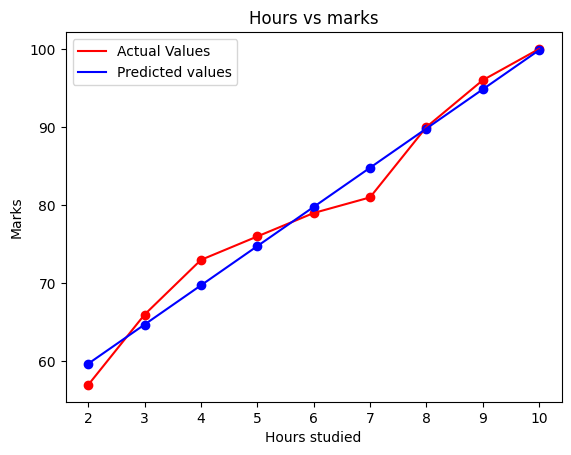

In [33]:
# plotting shit

plt.plot(X,Y, color='red',label='Actual Values')
plt.scatter(X,Y,color='red')

plt.plot(X, pred_values, color='blue', label='Predicted values')
plt.scatter(X,pred_values,color='blue')
plt.title('Hours vs marks')
plt.xlabel('Hours studied')
plt.ylabel('Marks')
plt.legend()
plt.show()

In [35]:
# Stage 6: final prediction

ask_hour = float(input('Enter hours studied: '))

marks = lin_reg.predict([[ask_hour]])
print('Predicted marks: ', int(marks[0]))

Enter hours studied: 9
Predicted marks:  94
